In [2]:
import sys
sys.path.append("../src/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import config


In [30]:
df = pd.read_excel(config.TRAINING_FILE, na_values='nan')
df.drop('CIF', axis=1, inplace=True)
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   object        
 1   AGE                                 1249 non-null   int64         
 2   CUS_Month_Income                    1238 non-null   float64       
 3   CUS_Gender                          1247 non-null   object        
 4   CUS_Marital_Status                  1249 non-null   object        
 5   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 6   YEARS_WITH_US                       1249 non-null   int64         
 7   # total debit transactions for S1   1249 non-null   int64         
 8   # total debit transactions for S2   1249 non-null   int64         
 9   # total debit transactions for S3   1249 non-null   int64         
 10  total debit amount for S

In [32]:

new_cols_name = {
    'CUS_DOB' : "cus_dob",
    'AGE' : "age",
    'CUS_Month_Income' : "cus_month_income",
    'CUS_Gender' : "cus_gender",
    'CUS_Marital_Status' : "cus_marital_status",
    'CUS_Customer_Since' : "cus_customer_since",
    'YEARS_WITH_US' : "years_with_us",
    '# total debit transactions for S1':"total_debit_trans_s1",
    '# total debit transactions for S2':"total_debit_trans_s2",
    '# total debit transactions for S3':"total_debit_trans_s3", 
    'total debit amount for S1':"total_debit_amt_s1",
    'total debit amount for S2': "total_debit_amt_s2", 
    'total debit amount for S3' : "total_debit_amt_s3",
    '# total credit transactions for S1' : "total_credit_trans_s1",
    '# total credit transactions for S2': "total_credit_trans_s2",
    '# total credit transactions for S3': "total_credit_trans_s3", 
    'total credit amount for S1' : "total_credit_amt_s1",
    'total credit amount for S2':"total_credit_amt_s2",
    'total credit amount for S3':"total_credit_amt_s3",
    'total debit amount': "total_debit_amt", 
    'total debit transactions': "total_debit_trans", 
    'total credit amount': "total_credit_amt",
    'total credit transactions' : "total_credit_trans", 
    'total transactions': "total_transactions", 
    'CUS_Target' : "cus_target",
    'TAR_Desc' : "tar_desc",
    'Status' : "status"
}

df.rename(columns=new_cols_name, inplace=True)

In [33]:
df.columns

Index(['cus_dob', 'age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'cus_customer_since', 'years_with_us',
       'total_debit_trans_s1', 'total_debit_trans_s2', 'total_debit_trans_s3',
       'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3',
       'total_credit_trans_s1', 'total_credit_trans_s2',
       'total_credit_trans_s3', 'total_credit_amt_s1', 'total_credit_amt_s2',
       'total_credit_amt_s3', 'total_debit_amt', 'total_debit_trans',
       'total_credit_amt', 'total_credit_trans', 'total_transactions',
       'cus_target', 'tar_desc', 'status'],
      dtype='object')

In [34]:
df.isnull().sum()

cus_dob                   0
age                       0
cus_month_income         11
cus_gender                2
cus_marital_status        0
cus_customer_since        0
years_with_us             0
total_debit_trans_s1      0
total_debit_trans_s2      0
total_debit_trans_s3      0
total_debit_amt_s1        0
total_debit_amt_s2        0
total_debit_amt_s3        0
total_credit_trans_s1     0
total_credit_trans_s2     0
total_credit_trans_s3     0
total_credit_amt_s1       0
total_credit_amt_s2       0
total_credit_amt_s3       0
total_debit_amt           0
total_debit_trans         0
total_credit_amt          0
total_credit_trans        0
total_transactions        0
cus_target                0
tar_desc                  0
status                    0
dtype: int64

In [35]:
# Extracting all the null values in the cus_month_income features
df[df.cus_month_income.isnull()]

,cus_dob,age,cus_month_income,cus_gender,cus_marital_status,cus_customer_since,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,...,total_credit_amt_s2,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc,status
85,Apr 3 1957 12:00AM,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,9,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,Dec 31 1953 12:00AM,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,22,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,Jan 1 1900 12:00AM,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,1,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,Jan 2 1975 12:00AM,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,0,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN
368,May 7 1976 12:00AM,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,23,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE
400,Jul 15 1963 12:00AM,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,0,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN
427,Dec 7 1963 12:00AM,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,2,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,Feb 2 1961 12:00AM,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,47,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,Mar 13 1976 12:00AM,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,9,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE
996,Jan 1 1900 12:00AM,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,0,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant columns for clustering
data_for_clustering = df[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Identify optimal number of clusters (e.g., using the elbow method)
# In this example, let's assume we choose 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

# Assign cluster labels to missing values
missing_data = df[df['cus_month_income'].isnull()]
missing_data_for_clustering = missing_data[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]
scaled_missing_data = scaler.transform(missing_data_for_clustering)
missing_data['cluster_label'] = kmeans.predict(scaled_missing_data)

# Fill missing values with cluster centroids
for cluster_label in missing_data['cluster_label'].unique():
    cluster_centroid = kmeans.cluster_centers_[cluster_label]
    missing_data.loc[missing_data['cluster_label'] == cluster_label, 'cus_month_income'] = cluster_centroid[0]  # Assuming 'age' is the first feature

# Update the original dataframe with filled missing values
df.update(missing_data)


C:\Users\User\AppData\Local\Temp\ipykernel_12624\1904402163.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['cluster_label'] = kmeans.predict(scaled_missing_data)


In [37]:
df.cus_month_income

0          7116.64
1       1500000.00
2       5000000.00
3           500.00
4       9000000.00
           ...    
1244       4500.00
1245    3500000.00
1246       1000.00
1247    2000000.00
1248    5000000.00
Name: cus_month_income, Length: 1249, dtype: float64

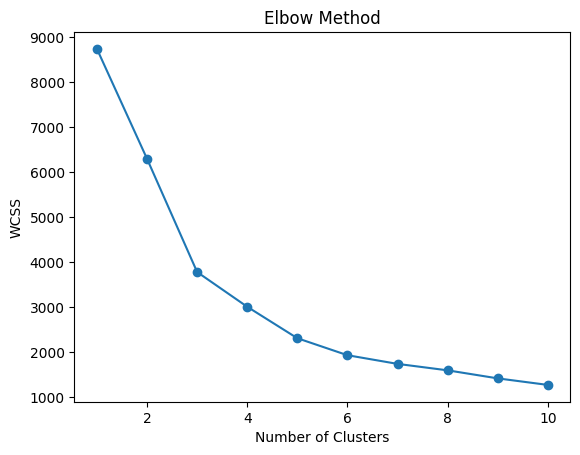

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant columns for clustering
data_for_clustering = df[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [54]:
raw_df = pd.read_excel("../data/Raw data/CHURNDATA.xlsx")
raw_df.drop(["CIF","CUS_DOB"], axis=1, inplace=True)
raw_df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [55]:
num_df = raw_df.select_dtypes(include='number')
cat_df = raw_df.select_dtypes(include='object')

In [52]:
raw_df.select_dtypes(include='object')

,CUS_Gender,CUS_Marital_Status,TAR_Desc,Status
0,MALE,MARRIED,EXECUTIVE,ACTIVE
1,FEMALE,SINGLE,LOW,ACTIVE
2,FEMALE,SINGLE,MIDLE,ACTIVE
3,FEMALE,SINGLE,LOW,ACTIVE
4,FEMALE,SINGLE,LOW,ACTIVE
...,...,...,...,...
1244,MALE,SINGLE,LOW,CHURN
1245,MALE,SINGLE,MIDLE,ACTIVE
1246,MALE,SINGLE,MIDLE,ACTIVE
1247,MALE,SINGLE,MIDLE,ACTIVE


In [58]:
from sklearn import preprocessing
def label_encode_categorical(df, cols):
    """_summary_
    Args:
        df (dataframe): Input DataFrame with categorical columns.
        cols (list): List of column names to be label encoded.
    """
    df_encoded = df.copy()

    for col in cols:
        le = preprocessing.LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])

    return df_encoded

df_encoded = label_encode_categorical(raw_df, cat_df.columns)

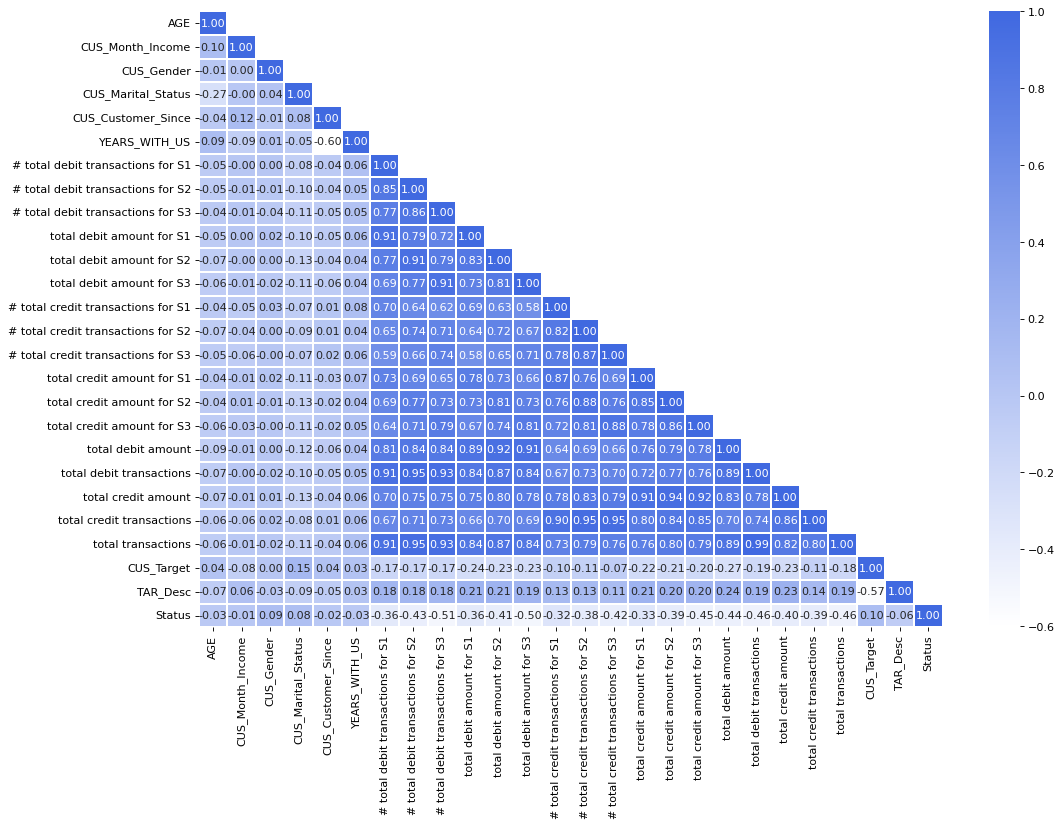

In [60]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()


# Calculation of the Spearman correlation
target = 'Status'
df_ordered = pd.concat([df_encoded.drop(target,axis=1), df_encoded[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

In [69]:
corr

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
AGE,1.000000,0.098711,-0.005990,-0.270505,-0.037111,0.092213,-0.046804,-0.054624,-0.044838,-0.046414,...,-0.043168,-0.057425,-0.087852,-0.067120,-0.065751,-0.063807,-0.064689,0.040949,-0.071529,-0.029399
CUS_Month_Income,0.098711,1.000000,0.003507,-0.004660,0.116490,-0.086744,-0.000595,-0.005995,-0.007723,0.000738,...,0.005499,-0.032471,-0.007755,-0.004059,-0.007931,-0.055551,-0.009838,-0.084943,0.061257,-0.007119
CUS_Gender,-0.005990,0.003507,1.000000,0.037610,-0.008885,0.011483,0.003072,-0.011536,-0.041171,0.023739,...,-0.008138,-0.004213,0.001069,-0.020410,0.007352,0.015867,-0.019449,0.002833,-0.029710,0.088306
CUS_Marital_Status,-0.270505,-0.004660,0.037610,1.000000,0.077651,-0.052414,-0.084354,-0.103410,-0.105703,-0.103739,...,-0.125593,-0.105007,-0.122710,-0.103567,-0.125861,-0.078662,-0.107414,0.151653,-0.091612,0.077766
CUS_Customer_Since,-0.037111,0.116490,-0.008885,0.077651,1.000000,-0.603216,-0.040117,-0.041006,-0.051436,-0.046677,...,-0.018558,-0.023178,-0.058991,-0.049702,-0.041126,0.008819,-0.041639,0.043147,-0.052898,-0.020554
YEARS_WITH_US,0.092213,-0.086744,0.011483,-0.052414,-0.603216,1.000000,0.064457,0.051039,0.047351,0.056358,...,0.043207,0.050133,0.043797,0.052114,0.058138,0.063926,0.055882,0.031216,0.028736,-0.033095
# total debit transactions for S1,-0.046804,-0.000595,0.003072,-0.084354,-0.040117,0.064457,1.000000,0.849475,0.770006,0.909114,...,0.685903,0.638119,0.805832,0.914546,0.703657,0.669509,0.907410,-0.167237,0.177775,-0.364238
# total debit transactions for S2,-0.054624,-0.005995,-0.011536,-0.103410,-0.041006,0.051039,0.849475,1.000000,0.861580,0.789282,...,0.773888,0.711077,0.843598,0.952496,0.749191,0.713038,0.947898,-0.170397,0.176084,-0.425698
# total debit transactions for S3,-0.044838,-0.007723,-0.041171,-0.105703,-0.051436,0.047351,0.770006,0.861580,1.000000,0.715785,...,0.731221,0.794260,0.836559,0.932942,0.752490,0.728264,0.932172,-0.172142,0.177510,-0.508517
total debit amount for S1,-0.046414,0.000738,0.023739,-0.103739,-0.046677,0.056358,0.909114,0.789282,0.715785,1.000000,...,0.726219,0.669173,0.885855,0.844607,0.753106,0.661000,0.843834,-0.235223,0.206925,-0.359456
